# BIG BASKET-CUSTOMER ANALYTICS

BigBasket (registered as, Supermarket Grocery Supplies Pvt. Ltd.) is an Indian online grocery delivery service. The company primarily delivers grocery goods found in convenience stores, home essentials and food supplies to its customers. BigBasket was founded in December 2011 and has its headquarters in Bengaluru, India

Customer analytics plays a crucial role in the success of BigBasket, the popular e-commerce platform specializing in the online grocery segment. By leveraging customer data and employing analytics techniques, BigBasket gains valuable insights into customer behavior, preferences, and patterns, enabling them to enhance the shopping experience and drive customer satisfaction.

One key aspect of customer analytics for BigBasket is understanding customer preferences and purchase patterns. By analyzing data related to customer transactions, browsing history, and search queries, BigBasket can identify popular products, frequently purchased items, and emerging trends. This information helps them optimize their product offerings, stock inventory accordingly, and tailor personalized recommendations to individual customers. By suggesting relevant products based on customer preferences, BigBasket increases the likelihood of repeat purchases and customer loyalty.

Customer analytics also helps BigBasket optimize their supply chain and logistics operations. By analyzing order patterns, delivery locations, and delivery timings, BigBasket can optimize their delivery routes, reduce delivery times, and ensure efficient order fulfillment. This leads to improved customer satisfaction and reinforces BigBasket's reputation for reliable and timely deliveries.

Furthermore, customer analytics provides valuable insights for BigBasket's pricing strategies. By analyzing customer purchasing patterns, price sensitivity, and competitor pricing, BigBasket can optimize their pricing models to remain competitive while maximizing profitability. This ensures that customers perceive BigBasket as offering value for money, attracting more customers and boosting revenue.

# PROCESSES

In [1]:
#importing dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'C:\Users\HP\Downloads\bigBasket.csv')

# Knowing and Cleaning Data

In [3]:
df

,Member,Order,SKU,Date,Time,Description
0,M09736,6468572,34993740,22/09/2014,22:45:00,Other Sauces
1,M09736,6468572,15669800,22/09/2014,22:45:00,Cashews
2,M09736,6468572,34989501,22/09/2014,22:45:00,Other Dals
3,M09736,6468572,7572303,22/09/2014,22:45:00,Namkeen
4,M09736,6468572,15669856,22/09/2014,22:45:00,Sugar
...,...,...,...,...,...,...
62136,M64379,8381435,15670260,16/11/2013,00:43:00,Organic F&V
62137,M64379,8381435,15668597,16/11/2013,00:43:00,Exotic Vegetables
62138,M64379,8381435,7570555,16/11/2013,00:43:00,Shoe Polish
62139,M64379,8381435,7587490,16/11/2013,00:43:00,Organic Dals & Pulses


In [106]:
#Checking for null values and duplicates
df.isnull().sum()

Member         0
Order          0
SKU            0
Date           0
Time           0
Description    0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [94]:
#Knowing data type
df.dtypes

Member         object
Order           int64
SKU             int64
Date           object
Time           object
Description    object
dtype: object

In [107]:
#Converting data type of date from object to date
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])

In [96]:
df.dtypes

Member                 object
Order                   int64
SKU                     int64
Date           datetime64[ns]
Time                   object
Description            object
dtype: object

# Data Modification

In [108]:
#Modification of date column to Month, year and day
df['Day_name'] = df['Date'].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

In [102]:
df

,Member,Order,SKU,Date,Time,Description,Day_name,Month_name,year
0,M09736,6468572,34993740,2014-09-22,22:45:00,Other Sauces,Monday,September,2014
1,M09736,6468572,15669800,2014-09-22,22:45:00,Cashews,Monday,September,2014
2,M09736,6468572,34989501,2014-09-22,22:45:00,Other Dals,Monday,September,2014
3,M09736,6468572,7572303,2014-09-22,22:45:00,Namkeen,Monday,September,2014
4,M09736,6468572,15669856,2014-09-22,22:45:00,Sugar,Monday,September,2014
...,...,...,...,...,...,...,...,...,...
62136,M64379,8381435,15670260,2013-11-16,00:43:00,Organic F&V,Saturday,November,2013
62137,M64379,8381435,15668597,2013-11-16,00:43:00,Exotic Vegetables,Saturday,November,2013
62138,M64379,8381435,7570555,2013-11-16,00:43:00,Shoe Polish,Saturday,November,2013
62139,M64379,8381435,7587490,2013-11-16,00:43:00,Organic Dals & Pulses,Saturday,November,2013


In [109]:
#Modification of time to Morning, afternoon and evening
df['Hour'] = df['Time'].dt.hour


In [110]:
df['Time']=pd.to_datetime(df['Time']).dt.time

In [119]:
def categorize_time(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

In [120]:
df['Period'] = df['Hour'].apply(categorize_time)

In [122]:
df

,Member,Order,SKU,Date,Time,Description,Day_name,Month_name,year,Hour,Period
0,M09736,6468572,34993740,2014-09-22,22:45:00,Other Sauces,Monday,September,2014,22,Night
1,M09736,6468572,15669800,2014-09-22,22:45:00,Cashews,Monday,September,2014,22,Night
2,M09736,6468572,34989501,2014-09-22,22:45:00,Other Dals,Monday,September,2014,22,Night
3,M09736,6468572,7572303,2014-09-22,22:45:00,Namkeen,Monday,September,2014,22,Night
4,M09736,6468572,15669856,2014-09-22,22:45:00,Sugar,Monday,September,2014,22,Night
...,...,...,...,...,...,...,...,...,...,...,...
62136,M64379,8381435,15670260,2013-11-16,00:43:00,Organic F&V,Saturday,November,2013,0,Morning
62137,M64379,8381435,15668597,2013-11-16,00:43:00,Exotic Vegetables,Saturday,November,2013,0,Morning
62138,M64379,8381435,7570555,2013-11-16,00:43:00,Shoe Polish,Saturday,November,2013,0,Morning
62139,M64379,8381435,7587490,2013-11-16,00:43:00,Organic Dals & Pulses,Saturday,November,2013,0,Morning


# Exploratory Analysis

In [73]:
#Total number of customers
df['Member'].nunique()

106

In [77]:
#Customer with highest order
df.groupby('Member')['Order'].count().sort_values(ascending=False).head(5)

Member
M38622    1438
M33064    1318
M41747    1131
M32409    1106
M31966    1102
Name: Order, dtype: int64

In [78]:
#Customer with lowest order
df.groupby('Member')['Order'].count().sort_values(ascending=True).head(5)

Member
M96365    402
M47229    402
M51043    403
M57354    405
M50094    406
Name: Order, dtype: int64

In [80]:
#Days with most sales
df.groupby('Day_name')['Order'].count().sort_values(ascending=False)

Day_name
Saturday     10378
Friday        9678
Thursday      8821
Sunday        8758
Tuesday       8724
Wednesday     7912
Monday        7870
Name: Order, dtype: int64

<Axes: xlabel='Day_name', ylabel='count'>

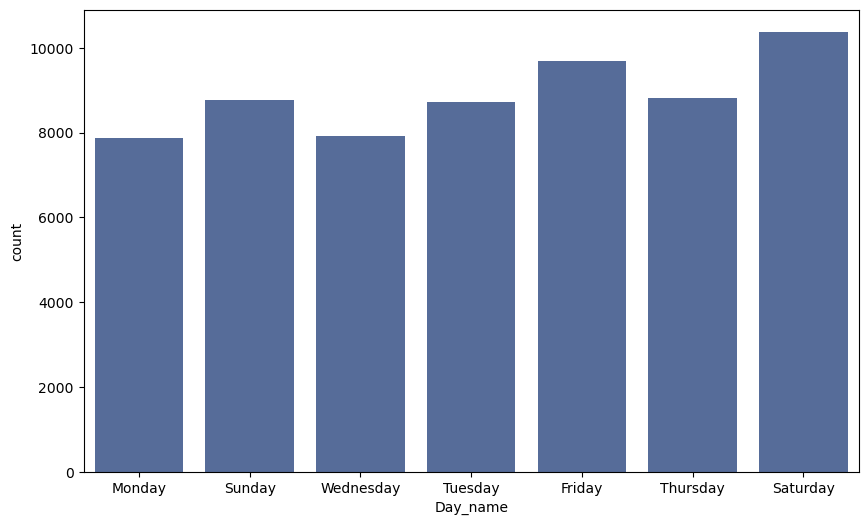

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_name', color='#4B68A4')

In [81]:
#Days with most sales
df.groupby('Month_name')['Order'].count().sort_values(ascending=False)

Month_name
August       6072
July         6011
September    5852
May          5635
June         5531
January      5389
March        5056
February     4718
April        4566
October      4461
December     4452
November     4398
Name: Order, dtype: int64

<Axes: xlabel='Month_name', ylabel='count'>

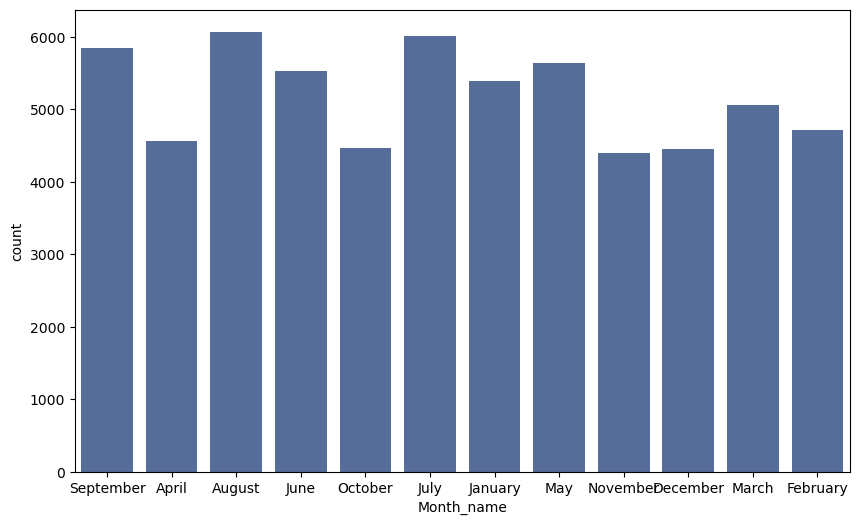

In [162]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month_name', color='#4B68A4')

In [83]:
#Days with most sales
df.groupby('year')['Order'].count().sort_values(ascending=False)

year
2013    28077
2014    24155
2012     9792
2011      117
Name: Order, dtype: int64

<Axes: xlabel='year', ylabel='count'>

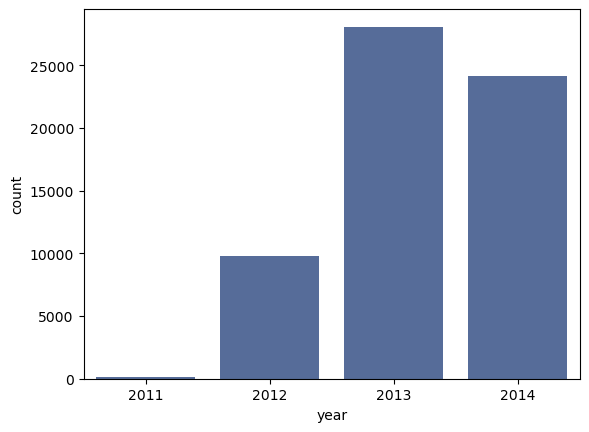

In [164]:
sns.countplot(data=df, x='year', color='#4B68A4')

In [85]:
#Most Sought after product
df.groupby('Description')['Order'].count().sort_values(ascending=False).head(10)

Description
Other Vegetables    4606
Beans               4549
Root Vegetables     4303
Other Dals          3272
Organic F&V         3113
Whole Spices        3001
Gourd & Cucumber    2973
Brinjals            2569
Namkeen             2224
Banana              2188
Name: Order, dtype: int64

In [89]:
#Least Sought after product
df.groupby('Description')['Order'].count().sort_values(ascending=True).head(25)

Description
Cookery Books                  1
Tea                            1
Magazine                       1
Womens Deo                     1
Cutlery                        1
Bottle & Tin Openers           1
Cutters, Peelers & Scrapers    1
Dairy & Cheese                 1
Body Lotion                    1
Biscuits                       1
Lip Care                       1
Talc                           1
Exam Boards                    1
Dishwash Liquids & Pastes      1
Foot Care                      1
Fryums & Papad                 1
Organic Edible Oils & Ghee     1
Festive Gift Pack              1
Heat & Eat Ready Meals         1
Car Shampoo & Wax              1
Eye Care & Kajal               1
Office Stationery              1
Toilet Paper                   1
Baby Care Accessories          1
Ice Cream                      2
Name: Order, dtype: int64

In [123]:
#Time of day customers prefer buying
df.groupby('Period')['Order'].count().sort_values(ascending=False)

Period
Morning      23766
Night        20557
Afternoon    17818
Name: Order, dtype: int64

<Axes: xlabel='Period', ylabel='count'>

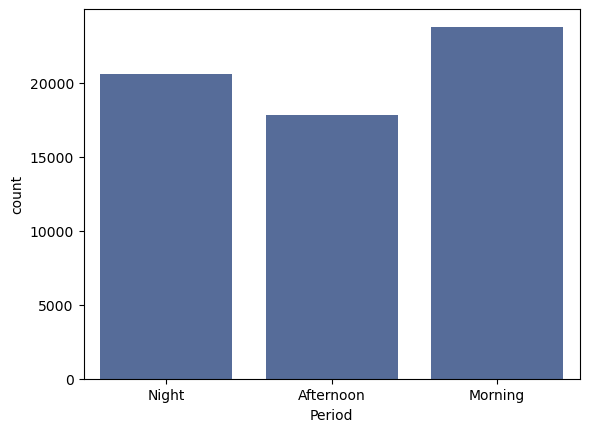

In [165]:
sns.countplot(data=df, x='Period', color='#4B68A4')

In [125]:
#THour of the day with more sales
df.groupby('Hour')['Order'].count().sort_values(ascending=False)

Hour
9     5296
11    4997
10    4943
20    4192
12    4065
19    4038
8     3953
21    3663
22    3163
13    3068
18    3007
15    2897
17    2822
14    2604
23    2494
16    2362
7     1823
0     1386
1      448
6      406
2      184
3      158
5       90
4       82
Name: Order, dtype: int64

# Recommendation